This notebook plots the green vs. violet reactivated 

In [22]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import autosmt_utils as au
import scipy.optimize as optimize
from scipy.stats import t
from scipy.stats import spearmanr

In [18]:
# set output directory and make this directory if it doesn't already exist
outdir = 'locsperframe/'
!mkdir {outdir}

In [9]:
# load in data and calculate number of localizations per frame and change in localization
# number before/after green and violet pulses
foldername = 'cell_by_cell_csvs_all/'
measfile = 'cell_by_cell_csvs_all/measurements.csv'
nframes = 600
config = au.read_config('analysis_settings.toml')
df = au.measurements_and_GV(foldername,nframes,config,measfile,outfbase=outdir)

0.15379260860338226 (0.14501915616708086, 0.16256606103968366)


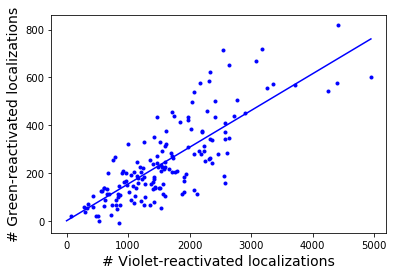

In [26]:
# Plot green vs. violet reactivations with a linear fit

def linear_fit(x, a):
    return a * x

fig,ax = plt.subplots(1,1)

v = df['vcounts'].to_numpy()
g = df['gcounts'].to_numpy()

popt, pcov = optimize.curve_fit(linear_fit, v,g)
slope = popt[0]
slope_stderr = np.sqrt(pcov[0, 0])
# Compute the 95% confidence interval for the slope parameter
dof = len(v) - 1  # degrees of freedom
t_critical = t.ppf(0.975, dof)  # critical t-value for alpha=0.05 and dof
slope_ci = (slope - t_critical * slope_stderr, slope + t_critical * slope_stderr)
print(slope,slope_ci)
ax.plot(v,g,'.',color='blue')
p1,=ax.plot([0,v.max()],[0,popt[0]*v.max()],'-',color='blue')
ax.set_xlabel('# Violet-reactivated localizations',fontsize=14)
ax.set_ylabel('# Green-reactivated localizations',fontsize=14);

fig.savefig(outdir + '/g_vs_v.png',dpi=300,bbox_inches='tight')
fig.savefig(outdir + '/g_vs_v.pdf',bbox_inches='tight')

Correlation of residuals for RAR WT
Spearman's rho: -0.018467959463820224
p-value: 0.8172725383806645



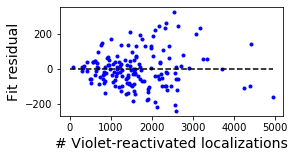

In [31]:
# make a plot of the residuals, and calculate the Spearman correlation coefficient and p value

df = pd.DataFrame({'violet_locs':v,'residual':g-slope*v})
df.to_csv(outdir + '/residuals_RXR_to_RAR_WT.csv')

# print correlation in the residuals
r, p = spearmanr(v,g-slope*v)
print('Correlation of residuals for RAR WT')
print("Spearman's rho:", r)
print("p-value:", p)
print()

fig,ax = plt.subplots(1,1,figsize=[4,2])
p1,=ax.plot(v,g-slope*v,'.',color='blue')
ax.plot([0,v.max()],[0,0],'--',color='black');

ax.set_xlabel('# Violet-reactivated localizations',fontsize=14)
ax.set_ylabel('Fit residual',fontsize=14);

fig.savefig(outdir + '/g_vs_v_residuals.png',dpi=300,bbox_inches='tight')
fig.savefig(outdir + '/g_vs_v_residuals.pdf',bbox_inches='tight')